# Import needed libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Upload data

In [29]:
data = pd.read_csv('daily_routines.csv', sep=';')

Данные включают информацию о людях и их привычках. Одна строка - 1 человек, по столбцам: 24 столбца - статус (работал ли обычно в этот период времени), остальные - даты рождения и смерти, отметки, придерживался ли распорядка дня постоянно, входили в привычки физические упражнения и т.п.

# Choose pallette of colors for visualization

In [23]:
my_colormap = ('cornflowerblue', 'powderblue', 'lavender', 'linen', 'wheat')

# Visualization: a pie graph

## One layer

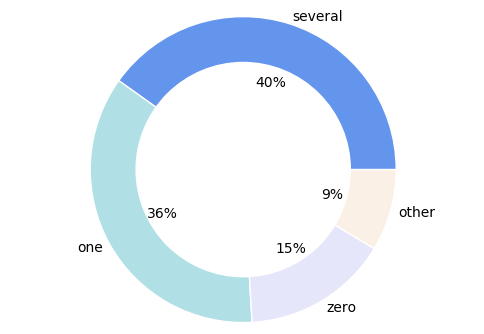

In [25]:
#preprocessing data
stable = data.Stability.value_counts()
#creating a common pie graph
plt.pie(stable, labels=('several', 'one', 'zero', 'other'), labeldistance=1.05, 
        autopct='%.0f%%', colors=my_colormap)
#dimensions x and y should have the same length
plt.axis('equal')
#edges of sections should be white
plt.rcParams['patch.edgecolor'] = 'white'
#adding a smaller white circle in the middle of bigger one
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#showing the result
plt.show()

## Two layers

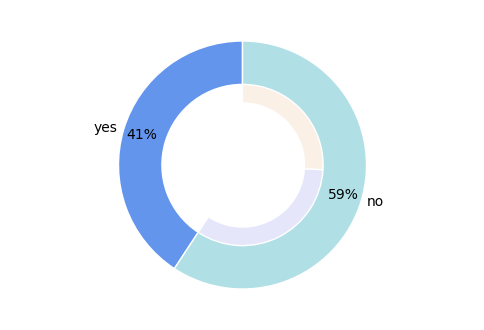

In [26]:
#preprocessing data
walk = data.Walking_or_exercises.value_counts()
#creating a common pie graph
plt.pie([walk[0], walk[1]+walk[2]], labels=('yes', 'no'), labeldistance=1.05, 
        autopct='%.0f%%', colors=('cornflowerblue', 'powderblue'), startangle=90, pctdistance=0.85)
#dimensions x and y should have the same length
plt.axis('equal')
#edges of sections should be white
plt.rcParams['patch.edgecolor'] = 'white'
#creating the second layer of data as a common pie graph
plt.pie(walk, colors=('white', 'lavender', 'linen'), radius=0.65, startangle=90)
#adding a smaller white circle in the middle of bigger one
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#showing the result
plt.show()

# Visualization: bar plots

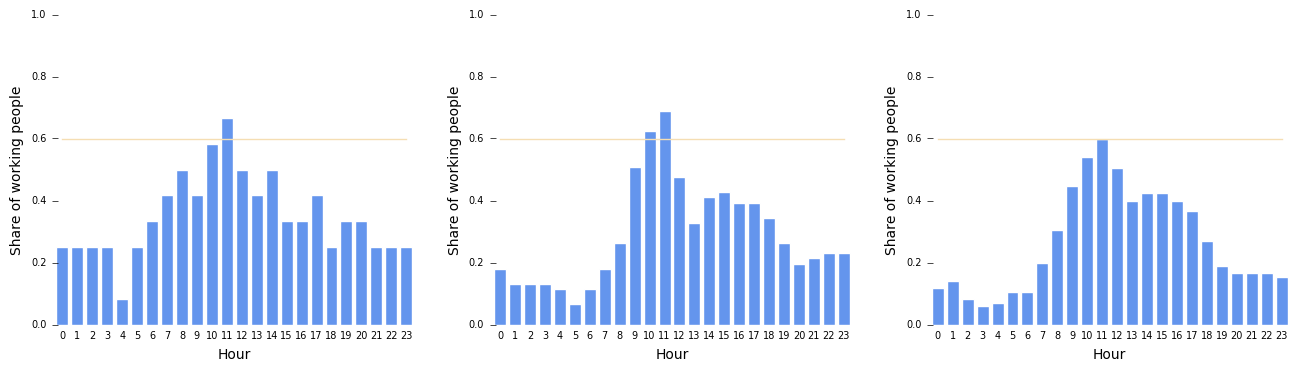

In [27]:
#preprocessing data
work_ratio_18 = [len(data['h{}'.format(x)][data.Birth//100+1 == 18][data['h{}'.format(x)] == 'Work'])*1./len(data[data.Birth//100+1 == 18]) 
                 for x in range(24)]
work_ratio_19 = [len(data['h{}'.format(x)][data.Birth//100+1 == 19][data['h{}'.format(x)] == 'Work'])*1./len(data[data.Birth//100+1 == 19])
                 for x in range(24)]
work_ratio_20 = [len(data['h{}'.format(x)][data.Birth//100+1 == 20][data['h{}'.format(x)] == 'Work'])*1./len(data[data.Birth//100+1 == 20]) 
                 for x in range(24)]

#determining size of a figure
fig = plt.figure(figsize=(16, 4))

#creating a left plot
ax = fig.add_subplot(131) #it's left plot
ax.bar(np.arange(24), work_ratio_18, align='center', color=['cornflowerblue']) #it's a bar plot
ax.plot([0.6]*24, color='wheat') #a horizontal line on the plot
#fixed scales for all plots
ax.set_xlim(-0.7, 23.7)
ax.set_ylim(0, 1)
#axes' titles
plt.ylabel('Share of working people')
plt.xlabel('Hour') 
#without frame around the plot but with ticks on axes
ax.set_frame_on(False) 
plt.xticks(np.arange(24), size=7)
plt.yticks(size=7)
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

#creating a middle plot
ax = fig.add_subplot(132)
ax.bar(np.arange(24), work_ratio_19, align='center', color=['cornflowerblue'])
ax.plot([0.6]*24, color='wheat')
ax.set_xlim(-0.7, 23.7)
ax.set_ylim(0, 1)
ax.set_frame_on(False)
plt.ylabel('Share of working people')
plt.xlabel('Hour')
plt.xticks(np.arange(24), size=7)
plt.yticks(size=7)
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

#creating a right plot
ax = fig.add_subplot(133)
ax.bar(np.arange(24), work_ratio_20, align='center', color=['cornflowerblue'])
ax.plot([0.6]*24, color='wheat')
ax.set_xlim(-0.7, 23.7)
ax.set_ylim(0, 1)
ax.set_frame_on(False)
plt.ylabel('Share of working people')
plt.xlabel('Hour')
plt.xticks(np.arange(24), size=7)
plt.yticks(size=7)
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

#displaying the result
plt.show()

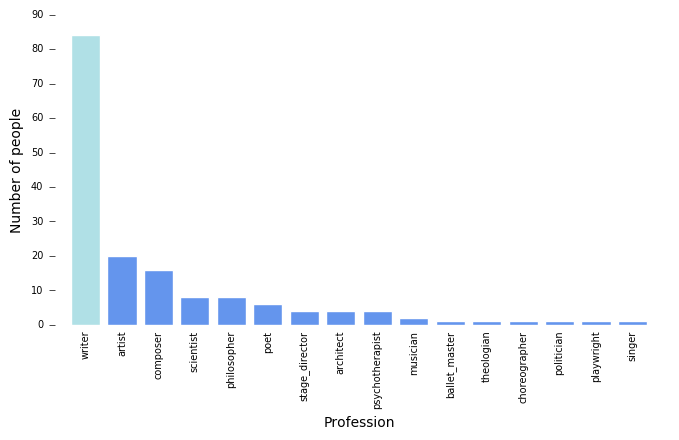

In [28]:
#preprocessing data
professions = data.Profession.value_counts()
#determining size of a figure
fig = plt.figure(figsize=(8, 4))
#the only subplot
ax = fig.add_subplot(111)
#it's a bar plot with different colors for the first column and all others
plt.bar(range(len(set(data.Profession))), professions, align='center', color=['powderblue']+['cornflowerblue']*(len(set(data.Profession))-1))
#axes' titles
plt.ylabel('Number of people')
plt.xlabel('Profession')
#fixed scale for x
plt.xlim(-1, 16)
#certain vertical titles for ticks on the axis x
plt.xticks(np.arange(len(set(data.Profession))), professions.index.tolist(), rotation='vertical', size=7)
#the same size for ticks on the axis y
plt.yticks(size=7)
#without frame around the plot but with ticks on axes
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')
ax.set_frame_on(False)
#displaying the result
plt.show()

# Visualization of clusterization results

In [30]:
#preprocessing data
data_for_model = pd.DataFrame()
for i in range(24):
    data_for_model['h{}'.format(i)] = [1 if data.loc[j, 'h{}'.format(i)] == 'Work' else 0 for j in range(len(data))]
hi = [c for c in data.columns if 'h' in c]

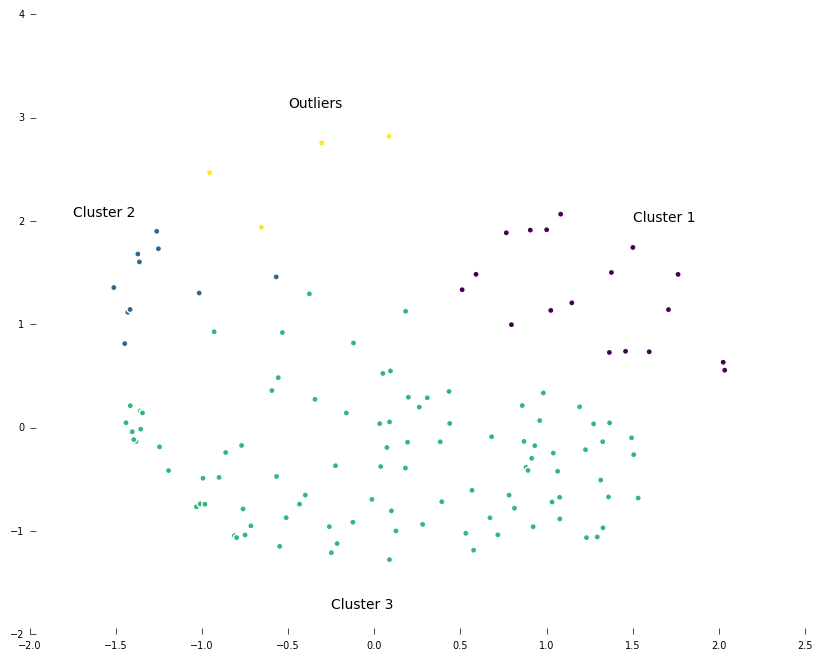

In [32]:
#dimension reduction with PCA
pca = PCA(n_components=2, random_state=17)
data_for_model_transformed_pca = pca.fit_transform(data_for_model[hi[:-2]])
#clusterization of gotten data
db = DBSCAN(eps=0.53, min_samples=5).fit(data_for_model_transformed_pca)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#visualization
fig = plt.figure(figsize=(10, 8)) #certain size of figure
ax = fig.add_subplot(111) #the only plot
#creating a scatter plot
plt.scatter(data_for_model_transformed_pca[:, 0], data_for_model_transformed_pca[:, 1], c=labels, cmap=('viridis_r'))
#ticks and borders parameters
plt.xticks(size=7)
plt.yticks(size=7)
plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
ax.set_frame_on(False)
#adding titles for clusters
plt.annotate('Outliers', xy=(0.1, 2.5), xytext=(-0.5, 3.1))
plt.annotate('Cluster 3', xy=(0, -1), xytext=(-0.25, -1.75))
plt.annotate('Cluster 2', xy=(-1, 2), xytext=(-1.75, 2.05))
plt.annotate('Cluster 1', xy=(1, 2), xytext=(1.5, 2))
#displaying the result
plt.show()